In [2]:
from panpe import InferenceModel, ExpDataset, ROOT_DIR

In [3]:
model = InferenceModel.from_config("panpe-2layers-xrr")

Loaded model model_panpe-2layers-xrr.pt


In [4]:
exp_dset = ExpDataset(ROOT_DIR / "data/xrr_data.h5")

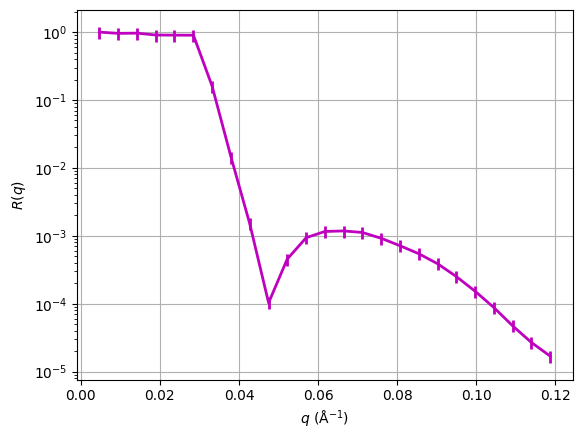

In [6]:
exp_dset[110].plot()

PANPE-IS:   0%|          | 0/500 [00:00<?, ? Neff/s]

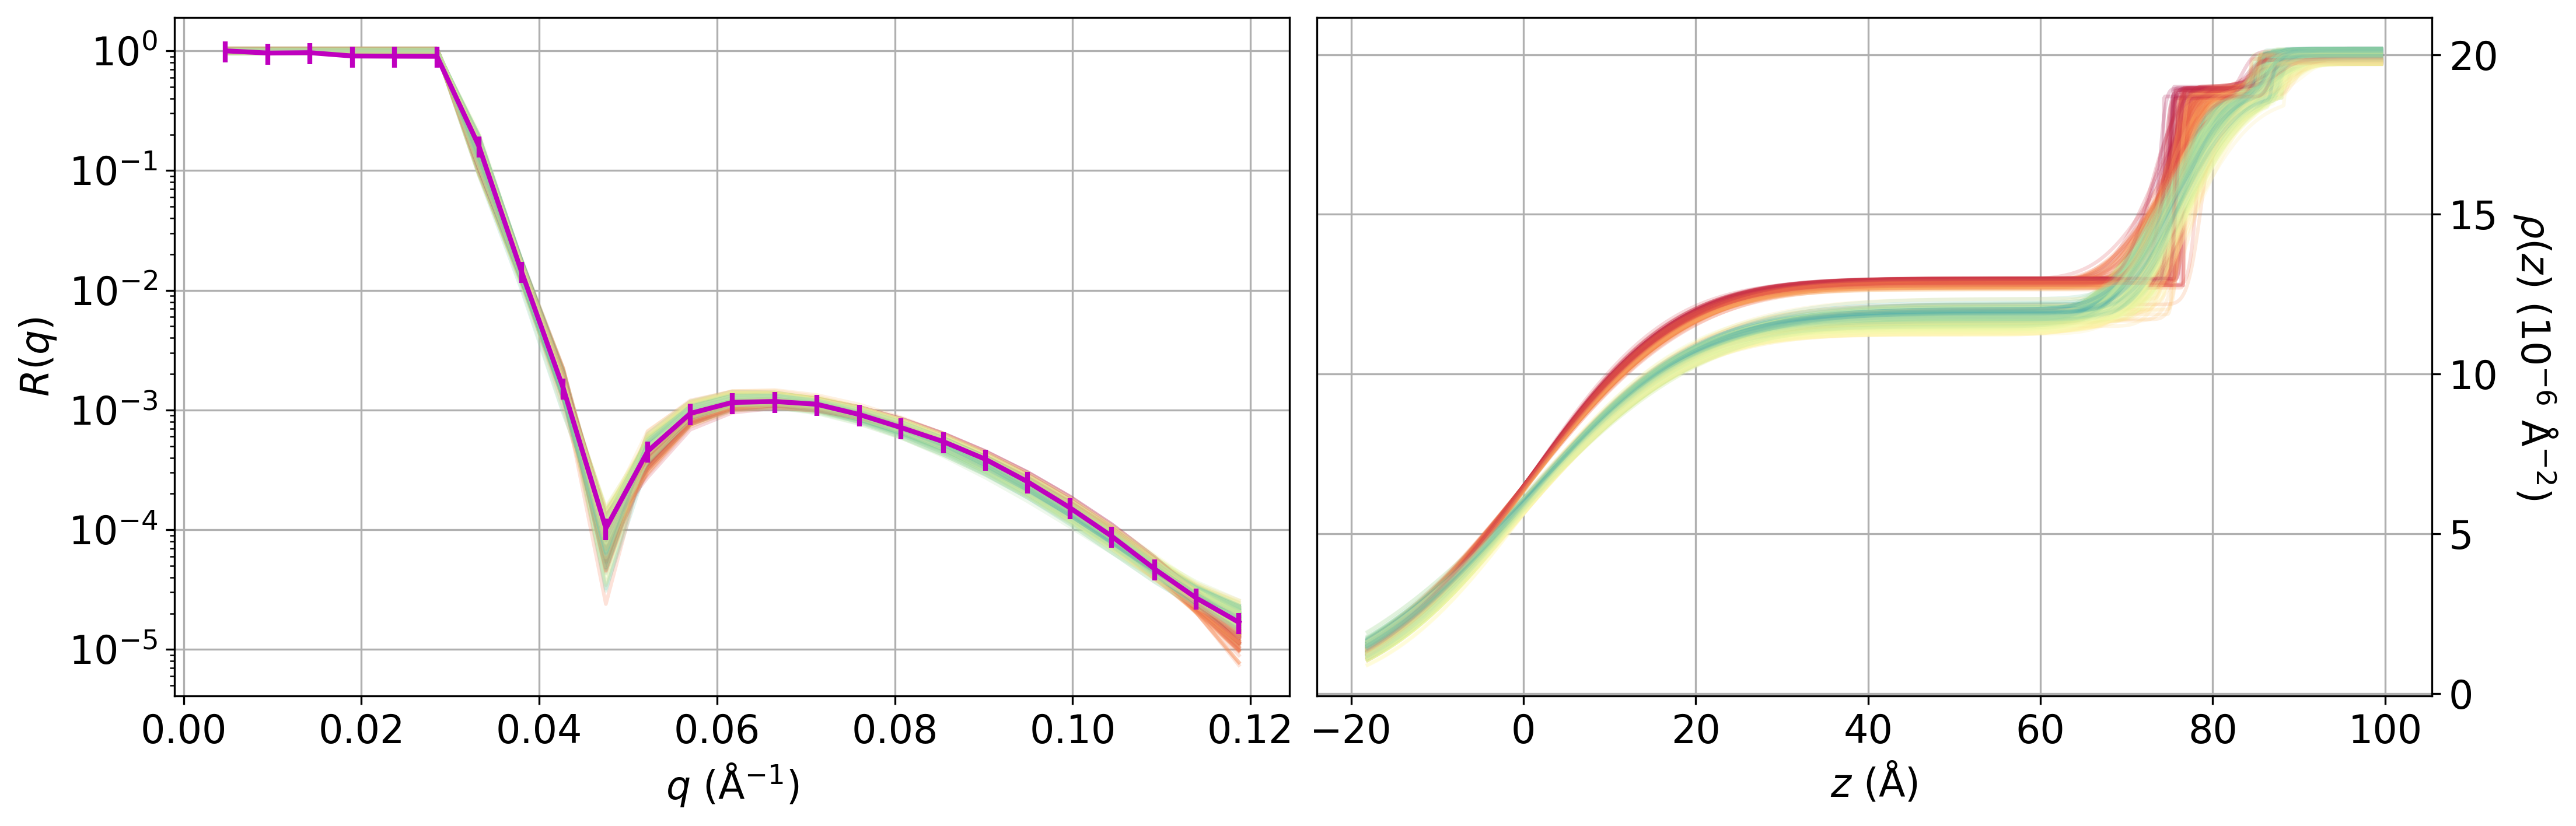

In [7]:
# PANPE-IS
res = model(exp_dset[110])
res.plot_sampled_profiles()

In [15]:
print(f"PANPE-IS sample efficiency: {res.importance_sampling.eff:.2e}")
print(f"Conventional IS sample efficiency estimation: {res.get_snis_sample_eff_estimation():.2e}")

PANPE-IS sample efficiency: 1.04e-02
Conventional IS sample efficiency estimation: 1.21e-05


In [16]:
backend, state = res.run_panpe_mcmc(num_iterations=1000, thin_by=10, burn_in=900, num_chains=2 ** 14)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [22]:
from panpe.visualization.plot_sampled_profiles import plot_sampled_profiles

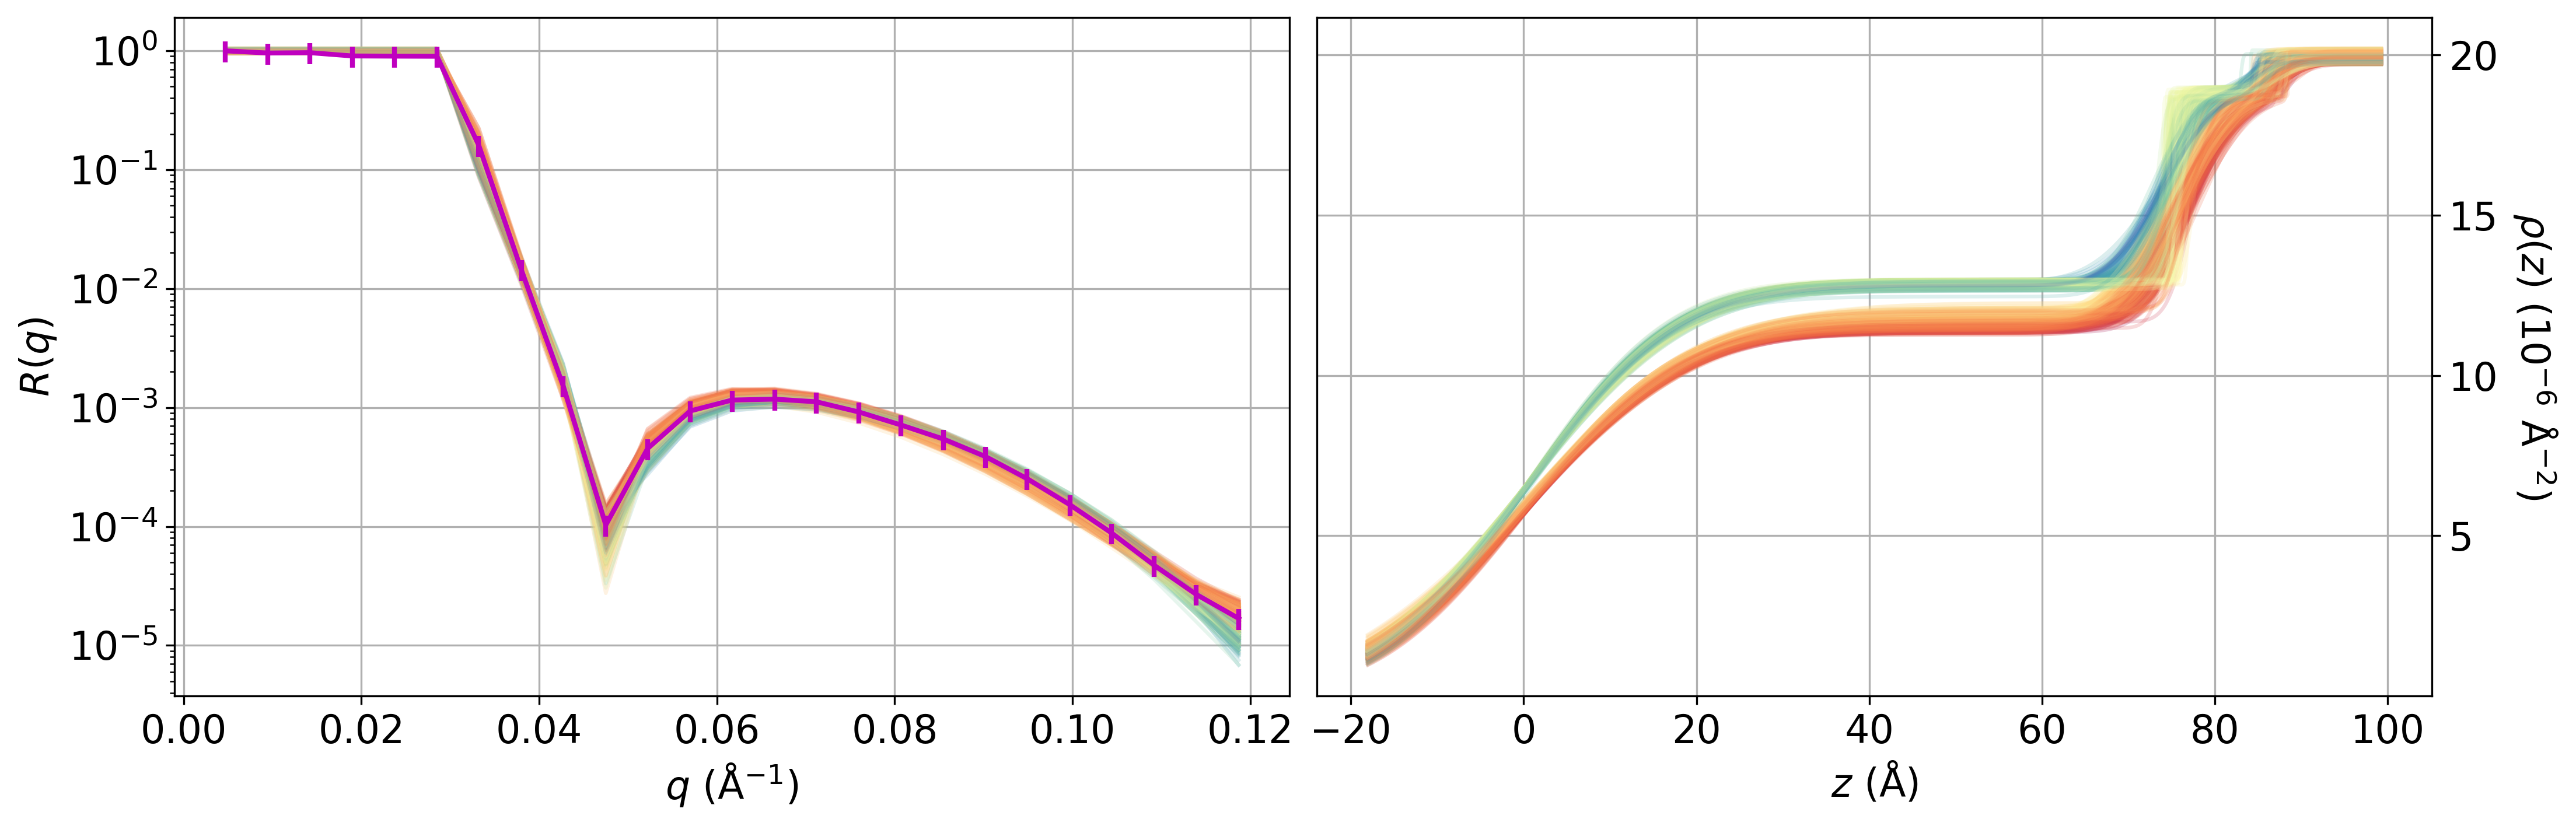

In [23]:
# PANPE-MCMC
plot_sampled_profiles(res.data, state.coords[::17], res.model.simulator.physical_model)

In [24]:
import scipy
from chainconsumer import ChainConsumer